### Input => Conv1 => Pooling1 => Conv2 => Pooling2 => Fully-connected

In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.reset_default_graph()
tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1]) # img 28x28x1 (black/white)
Y = tf.placeholder(tf.float32, [None, 10])

# Conv layer imgIn shape=(?, 28, 28, 1): N개의 28x28 이미지 흑/백
# filter: 3x3, 흑/백, 32개
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))

# Conv -> Lelu -> Pooling
# Conv -> (?, 28, 28, 32)
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
print(L1)
L1 = tf.nn.relu(L1)
print(L1)
# Pool -> (?, 14, 14, 32)
# strides: 2x2 => output: 14x14
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
print(L1)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)


In [2]:
# Conv layer 2 imgIn shape=(?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
# Conv -> (?, 14, 14, 64)
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
print(L2)
L2 = tf.nn.relu(L2)
print(L2)
# Pool -> (?, 7, 7, 64)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
print(L2)
L2_flat = tf.reshape(L2, [-1, 7 * 7 * 64])
print(L2_flat)

Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 3136), dtype=float32)


In [3]:
# Final FC 7x7x64 inputs -> 10 outputs
W3 = tf.get_variable("W3", shape=[7 * 7 * 64, 10], initializer=tf.contrib.layers.xavier_initializer())
# 출력의 값과 동일하게
b = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L2_flat, W3) + b

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [4]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
        
    print('Epoch:', '%04d' % (epoch + 1), 'cost:', '{:.9f}'.format(avg_cost))

Learning started. It takes sometime.
Epoch: 0001 cost: 0.345624178
Epoch: 0002 cost: 0.091800820
Epoch: 0003 cost: 0.068341240
Epoch: 0004 cost: 0.056286761
Epoch: 0005 cost: 0.046985533
Epoch: 0006 cost: 0.040991215
Epoch: 0007 cost: 0.036612940
Epoch: 0008 cost: 0.032727912
Epoch: 0009 cost: 0.027864520
Epoch: 0010 cost: 0.024687044
Epoch: 0011 cost: 0.021981100
Epoch: 0012 cost: 0.020160543
Epoch: 0013 cost: 0.016726402
Epoch: 0014 cost: 0.015177160
Epoch: 0015 cost: 0.013261351


In [5]:
print('Learning finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

Learning finished!
Accuracy: 0.9882


In [6]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print('Label:', sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
print('Prediction:', sess.run(tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r+1]}))

Label: [9]
Prediction: [9]


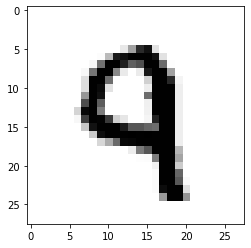

In [7]:
plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()